In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import numpy as np

In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

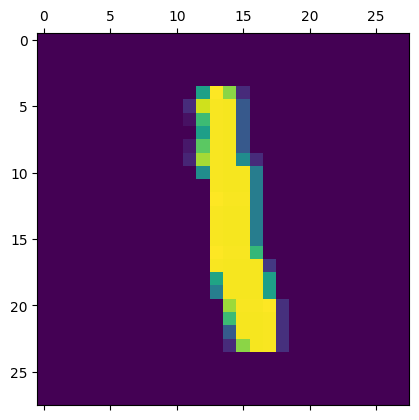

In [8]:
plt.matshow(X_train[6])

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape


(10000, 784)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7608 - accuracy: 0.8408
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0976 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5889 - accuracy: 0.8840
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3938 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3718 - accuracy: 0.8850


In [19]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 6.2881 - accuracy: 0.8815


[6.28805685043335, 0.8815000057220459]

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([5.7817597e-06, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       9.4533756e-12, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

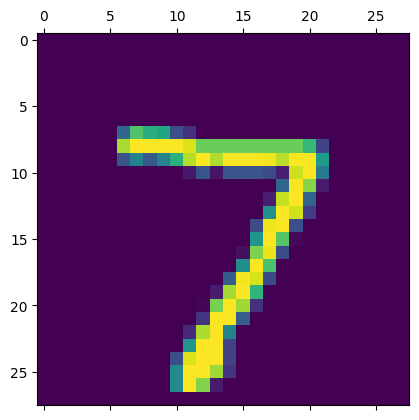

In [21]:
plt.matshow(X_test[0])


In [22]:
np.argmax(y_predicted[0])


2

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [24]:
y_predicted_labels[:5]


[2, 0, 1, 0, 0]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    1,    0,    0,    3,    0,    0,    0,    0],
       [   7, 1126,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 375,  264,  380,    2,    9,    0,    2,    0,    0,    0],
       [ 562,  146,  166,  135,    0,    0,    0,    1,    0,    0],
       [ 137,   26,   90,  190,  537,    0,    0,    0,    2,    0],
       [ 418,   22,   88,  169,   64,  129,    1,    0,    1,    0],
       [ 265,   10,  525,   36,   86,   24,   12,    0,    0,    0],
       [ 123,  145,  336,  373,   35,   11,    0,    5,    0,    0],
       [ 226,  257,  327,   66,   43,   42,    1,    0,   12,    0],
       [  99,   54,  131,  563,  158,    2,    0,    2,    0,    0]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

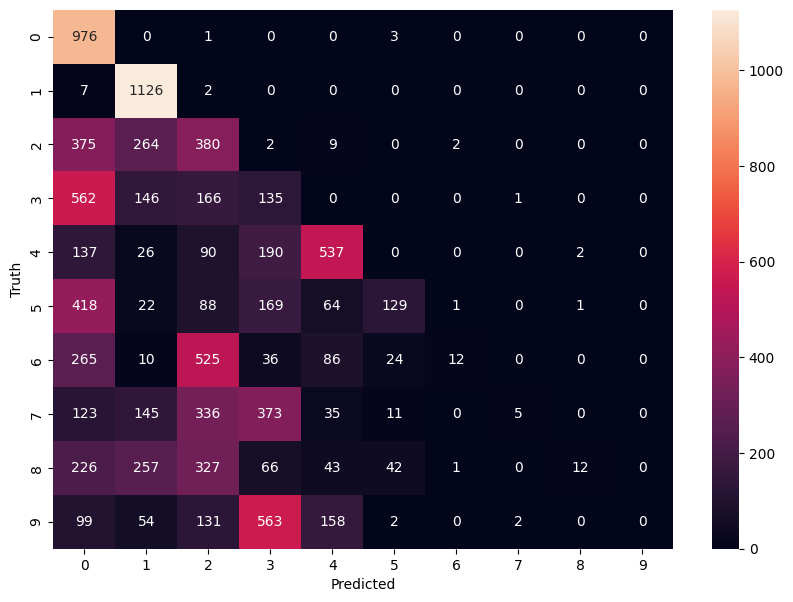

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 6.2881 - accuracy: 0.8815


[6.28805685043335, 0.8815000057220459]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

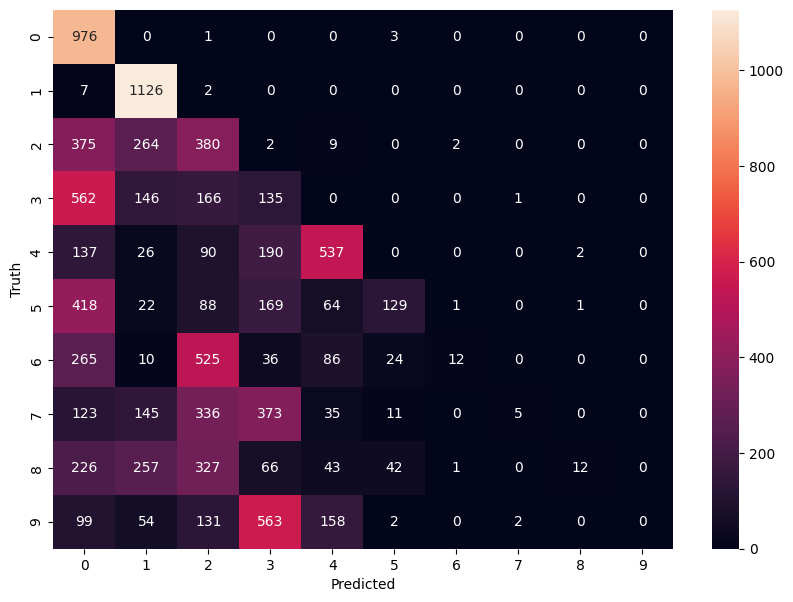

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 2.5233 - accuracy: 0.8494
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4167 - accuracy: 0.8997
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3048 - accuracy: 0.9215
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2557 - accuracy: 0.9331
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2375 - accuracy: 0.9390
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2194 - accuracy: 0.9444
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2088 - accuracy: 0.9467
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2014 - accuracy: 0.9495
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1984 - accuracy: 0.9500
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.18

In [30]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3202 - accuracy: 0.9420


[0.32024237513542175, 0.9419999718666077]